# Echantillonnage et reconstruction

## Introduction

#### Définitions

- L'échantillonnage est la transformation d'un signal analogique en une suite de ses valeurs prises à des instants bien définis
- La reconstruction est la conversion d'un signal échantillonné en un signal continu, défini en tout temps

En pratique, l'échantillonnage est effectué via des convertisseurs analogiques-numériques (CAN, ou en anglais ADC), alors que la reconstruction est effectuée via des convertisseurs numériques-analogiques (CNA, ou en anglais DAC).

## Echantillonnage

Un signal continu est un signal défini à tout instant. On ne parle donc pas de continuité d'une fonction au sens mathématique du terme.

#### Exemple 1
Représentons une exponentielle décroissante (fonction continue) ainsi qu'un signal carré (fonction discontinue). 

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('../my_params.mplstyle')

import math

In [3]:
time = [i*50/10000 for i in range(10001)]

signal_1 = [math.exp(-0.1*t) for t in time]
signal_2 = [1 if (t < 10 or (t > 25 and t < 30)) else 0 for t in time]

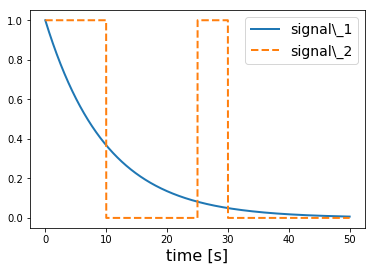

In [4]:
fig, ax = plt.subplots()
ax.plot(time, signal_1, '-', label='signal\_1')
ax.plot(time, signal_2, '--', label='signal\_2')
ax.set_xlabel('time [s]')
_ = ax.legend()

Malgré la discontinuité mathématique du signal *signal_2*, il est bien défini à tout instant et donc est dit *continu*.

Un signal discret est un signal défini à des instants précis uniquement. Entre les instants $t_k, k \in Z$, le signal n'existe pas. Autrement dit, ce signal n'existe presque jamais!

#### Exemple 2
Reprenons notre exponentielle décroissante (*signal_1*) que l'on va échantillonner toutes les $5s$.

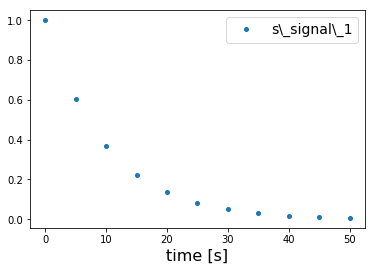

In [5]:
s_time = [t for t in time if not t%5]

s_signal_1 = [math.exp(-0.1*t) for t in s_time]

fig, ax = plt.subplots()
ax.plot(s_time, s_signal_1, '.', label='s\_signal\_1')
ax.set_xlabel('time [s]')
_ = ax.legend()

Le signal n'existe que pour les valeurs de $t \in \{0, 5, 10, \dots\}$.

Attention tout de même qu'un signal discret ou échantillonné n'est pas forcément numérique!

En général, l'échantillonnage n'est que la première étape vers la numérisation du signal afin que ce dernier soit traité par un PC. Pour cela, le signal discret doit être transformé en nombre représentable dans la mémoire de l'ordinateur. Seulement, ce dernier possède en général un nombre de bits de codage fini. Ce qui implique qu'il n'est pas capable de représenter n'importe quel nombre. Ce phénomène est appelé la quantification.

#### Exemple 3
Afin de mesurer une température, on utilise un capteur permettant de mesurer une plage de température de $0\dots100\,^\circ{}\mathrm{C}$. Ce dernier renvoie une information en $4\dots20\,\mathrm{mA}$ vers un convertisseur AN. Prenons successivement un CAN 12 bits et 8 bits.

In [6]:
def capteur(signal, s_min, s_max):
    return signal / (s_max - s_min) * 16 + 4
    
def CAN(signal, s_min, s_max, bits):
    print('Convertisseur CAN {} bits'.format(bits))
    resolution_mA = (s_max - s_min) / (2 ** bits)
    resolution_C = 100 / (2 ** bits)
    print('La résolution vaut {} mA, soit {} °C'.format(resolution_mA, resolution_C))
    
    n_signal = [int(s / resolution_mA) * resolution_mA for s in signal]
    print('Les valeurs stockées en mémoire, après reconversion en 4...20 mA sont:')
    print(n_signal)
    print('\n')
    
    return n_signal

In [7]:
c_signal_1 = [capteur(s, 0, 100) for s in s_signal_1]
print('Le signal mesuré par le capteur est:')
print(c_signal_1)
print('\n')

n_signal_1_12 = CAN(c_signal_1, 4, 20, 16)
n_signal_1_8 = CAN(c_signal_1, 4, 20, 8)

Le signal mesuré par le capteur est:
[4.16, 4.0970449055540215, 4.058860710587431, 4.035700825623749, 4.021653645317858, 4.013133599779824, 4.007965930938858, 4.004831581347571, 4.002930502222197, 4.001777439446119, 4.001078071519854]


Convertisseur CAN 16 bits
La résolution vaut 0.000244140625 mA, soit 0.00152587890625 °C
Les valeurs stockées en mémoire, après reconversion en 4...20 mA sont:
[4.159912109375, 4.096923828125, 4.058837890625, 4.03564453125, 4.021484375, 4.012939453125, 4.0078125, 4.004638671875, 4.0029296875, 4.001708984375, 4.0009765625]


Convertisseur CAN 8 bits
La résolution vaut 0.0625 mA, soit 0.390625 °C
Les valeurs stockées en mémoire, après reconversion en 4...20 mA sont:
[4.125, 4.0625, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]




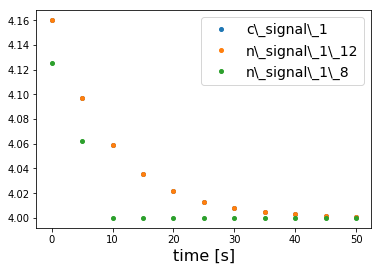

In [8]:
fig, ax = plt.subplots()
ax.plot(s_time, c_signal_1, '.', label='c\_signal\_1')
ax.plot(s_time, n_signal_1_12, '.', label='n\_signal\_1\_12')
ax.plot(s_time, n_signal_1_8, '.', label='n\_signal\_1\_8')
ax.set_xlabel('time [s]')
_ = ax.legend()

Il est à remarquer que le signal *n_signal_1_8* comprend une énorme erreur. De plus, l'effet est nonlinéaire. En effet, il est à remarquer que toutes les valeurs en-dessous de $4.06\,\mathrm{mA}$ sont remplacées par $4\,\mathrm{mA}$.

Evidemment, l'exemple a été choisi afin de bien visualiser l'effet de la quantification car le capteur possède un calibre bien trop grand par rapport à la mesure effectuée.

Dans la suite, nous supposerons que le phénomène de quantification n'intervient pas. Cette hypothèse est réaliste car, de nos jours, les convertisseurs sont suffisamment précis et, de ce fait, l'erreur est négligeable et peut être considérée comme une faible perturbation gérée par la robustesse du régulateur.

Nous supposerons aussi que l'échantillonnage est périodique. La période d'échantillonnage sera notée $h\ge0$, la fréquence $f_e=1/h$ et la pulsation d'échantillonnage $\omega_e=2\pi f_e$.

## Théorème d'échantillonnage

Le théorème d'échantillonnage est rappelé ci-dessous.

#### Théorème
Un signal analogique $w(t)$ dont la transformée de Fourier est nulle à l'extérieur de l'intervalle $[-\omega_0, \omega_0]$ est parfaitement défini par ses valeurs échantillonnées $\{w(kh)\}$ si la pulsation d'échantillonnage satisfait l'égalité:

$$ \omega_e \ge 2\omega_0 $$

La relation fournissant alors $w(t)$ est:

$$ w(t) = \sum_{k=-\infty}^\infty w(kh)\frac{sin\frac{\omega_e(t-kh)}{2}}{\frac{\omega_e(t-kh)}{2}}$$

Ce théorème nous fournit 2 informations importantes:

- $\omega_N = \omega_e/2$, appelée la pulsation de Nyquist, est très importante pour s'assurer que le signal échantillonné représente bien le signal continu
- pour reconstruire un signal nous avons besoin de connaître tous les échantillons passés et futurs

Le chapitre discutant de la réponse harmonique permettra de comprendre l'effet d'une mauvaise fréquence d'échantillonnage.

## Filtre de garde

Le théorème de la section 2.3 nous a appris que pour échantillonner un signal, il faut prendre une fréquence d'échantillonnage $\omega_e\ge 2\omega_0$, sachant que l'ensemble du spectre fréquentiel du signal à échantilloner se situe dans la plage $[-\omega_0, \omega_0]$.

En pratique, les bruits de mesures à hautes fréquences viennent élargir le spectre du signal à échantillonner, ce qui peut engendrer des soucis.

#### Exemple 4
Un signal carré est bruité par une sinusoïde de fréquence $0.9\,\mathrm{Hz}$ et échantillonné à $f_e=1\,\mathrm{Hz}$.

In [60]:
time = [i * 30 / 30000 for i in range(30001)]

signal = [1 if t <= 15 else -1 for t in time]
bruit = [0.2 * math.sin(2 * math.pi * 0.9 * t) for t in time]

signal_bruit = [s + b for s, b in zip(signal, bruit)]

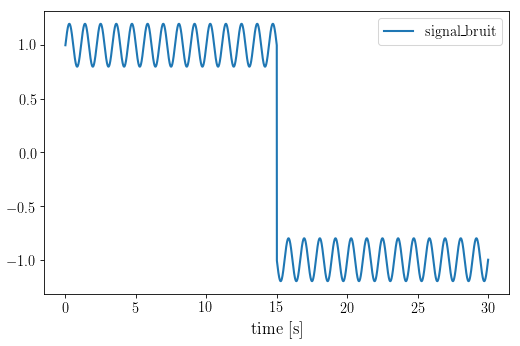

In [61]:
fig, ax = plt.subplots()
ax.plot(time, signal_bruit, '-', label='signal\_bruit')
ax.set_xlabel('time [s]')
_ = ax.legend()

In [62]:
h = 1

n = int(time[-1] / h)

s_time = [i * time[-1] / n for i in range(n+1)]

s_signal = [1 if t <= 15 else -1 for t in s_time]
s_bruit = [0.2 * math.sin(2 * math.pi * 0.9 * t) for t in s_time]

s_signal_bruit = [s + b for s, b in zip(s_signal, s_bruit)]

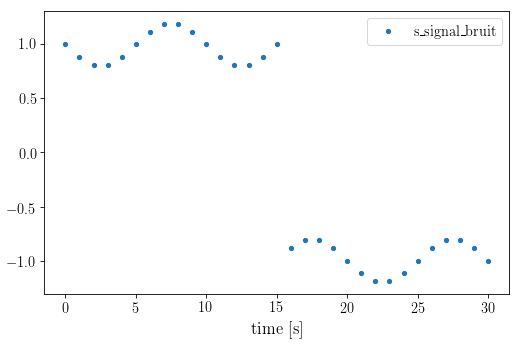

In [63]:
fig, ax = plt.subplots()
ax.plot(s_time, s_signal_bruit, '.', label='s\_signal\_bruit')
ax.set_xlabel('time [s]')
_ = ax.legend()

Il est facile de remarquer qu'on obtient un signal dont la sinusoïde bruitée possède une période de $10\,\mathrm{s}$, soit une fréquence de $0.1\,\mathrm{Hz}$. Le signal est donc complètement déformé à cause d'une mauvaise fréquence d'échantillonnage, qui devrait être supérieure à $1.8\,\mathrm{Hz}$.

Pour résoudre ce problème, on ajoute souvent, avant l'échantillonnage, un filtre passe-bas, appelé filtre de garde, de type Butterworth ou Bessel d'ordre 2, 4 ou 6.

Soit le filtre de Butterworth d'ordre 4:

$$ G(s) = \frac{1}{\left(\frac{s}{\omega_b}\right)^4 + 2.6131\left(\frac{s}{\omega_b}\right)^3 + 3.4142\left(\frac{s}{\omega_b}\right)^2 + 2.6131\frac{s}{\omega_b} + 1} $$

avec $\omega_b=2\pi\, 0.3\,\mathrm{rad/s}$.

Le signal avant échantillonnage devient:

In [64]:
import control

wb = 2 * math.pi * 0.3

num = [1]
den = [1 / (wb**4), 2.6131 / (wb**3), 3.4142 / (wb**2), 2.6131 / wb, 1]
G = control.tf(num, den)

_, f_signal_bruit, _ = control.forced_response(G, T=time, U=signal_bruit)

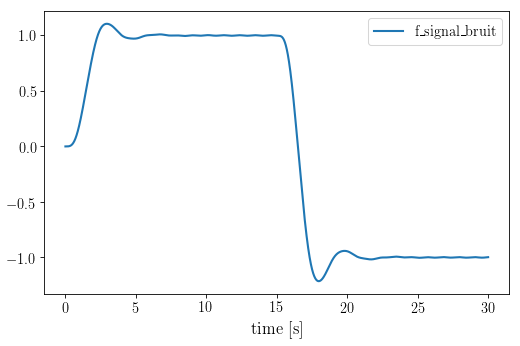

In [65]:
fig, ax = plt.subplots()
ax.plot(time, f_signal_bruit, '-', label='f\_signal\_bruit')
ax.set_xlabel('time [s]')
_ = ax.legend()

Le bruit sur le signal carré disparaît presque entièrement. Le signal carré est par contre aussi filtré, ce qui le déforme un peu.

Après échantillonnage de ce nouveau signal, on obtient:

In [66]:
s_f_signal_bruit = [s for t, s in zip(time, f_signal_bruit) if t in s_time]

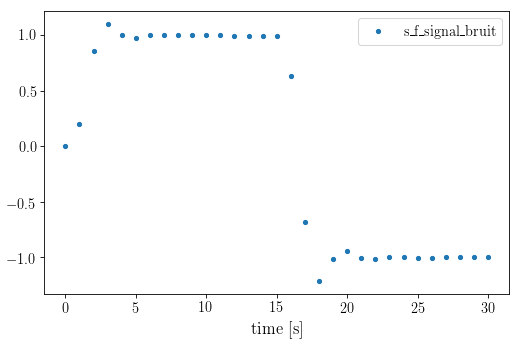

In [67]:
fig, ax = plt.subplots()
ax.plot(s_time, s_f_signal_bruit, '.', label='s\_f\_signal\_bruit')
ax.set_xlabel('time [s]')
_ = ax.legend()

Le résultat de l'échantillonnage représente maintenant beaucoup mieux le signal analogique. Cependant, la déformation du signal par le filtre étant assez importante, il faudra intégrer le filtre dans le système à réguler.

## Reconstruction

La reconstruction par le théorème de Shannon a besoin de tous les échantillons passés et futurs ($[-\infty, \infty]$). Cela est bien entendu impossible.

En pratique, on utilise un bloqueur afin de transformer un signal discret en signal continu. Il existe différents ordres de bloqueur, le plus utilisé étant le bloqueur d'ordre zéro (BOZ ou, en anglais, ZOH):

$$ w(t) = w(kh) \qquad t \in [kh, kh+h[ $$

#### Exemple 5
Après passage dans un BOZ, le signal filtré et échantillonné précédent ressemble à:

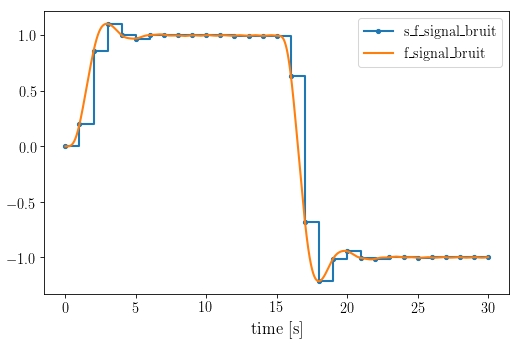

In [68]:
fig, ax = plt.subplots()
ax.step(s_time, s_f_signal_bruit, '.', where='post', label='s\_f\_signal\_bruit')
ax.plot(time, f_signal_bruit, '-', label='f\_signal\_bruit')
ax.set_xlabel('time [s]')
_ = ax.legend()

## Choix de la période d'échantillonnage

En commande numérique, il n'est pas possible de se suffire de la condition minimum du théorème de Shannon pour 2 raisons:

- la reconstruction de Shannon n'est pas employée en pratique; le BOZ ne peut se rapprocher du vrai signal que si on possède suffisamment d'échantillons (voir exemple 5)
- Aucun signal physique n'est à bande limitée et un filtre de garde passe-bas parfait est irréalisable

De ce fait, l'hypothèse du théorème de Shannon n'est jamais vérifiée. On choisira généralement:

$$ \omega_e = 10 \dots 20 \omega_0 $$

Le tableau suivant donne un ordre de grandeur pour différents domaines:

| Signal à échantillonner | Période d'échantillonnage h |
|---|---|
| Courant dans les entraînements électriques | $$50 \dots 100\, \mathrm{\mu{}s}$$ |
| Position en robotique | $$0.2 \dots 1\, \mathrm{ms}$$ |
| Position en machine-outil | $$0.5 \dots 10\, \mathrm{ms}$$ |
| Débit | $$1 \dots 3\, \mathrm{s}$$ |
| Pression | $$1 \dots 5\, \mathrm{s}$$ |
| Niveau | $$5 \dots 10\, \mathrm{s}$$ |
| Température | $$10 \dots 45\, \mathrm{s}$$ |